In [8]:
import pandas as pd
import re
import csv
from datetime import datetime, timedelta
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report

In [9]:
input_file = 'cleansing_data_Registrasi.csv'
output_file = 'output_cleansing_data_Registrasi.csv'

column1_index = 6
column2_index = 10

with open(input_file, 'r') as file_in, open(output_file, 'w', newline='') as file_out:
   reader = csv.reader(file_in)
   writer = csv.writer(file_out)

   for row in reader:
       if column1_index < len(row) and column2_index < len(row):
           combined_value = row[column1_index] + ' ' + row[column2_index]

           row[column1_index] = combined_value

       writer.writerow(row)

print("Columns combined successfully.")

Columns combined successfully.


In [14]:
data = pd.read_csv('output_cleansing_data_Registrasi.csv')
data

,IP,IP Awal,IP Oktet 2,IP Oktet 3,IP Oktet 4,IP Gabungan,TGL_GABUNGAN,JAM,MENIT,DETIK,JAM GABUNG,METHOD,ACTION
0,108.162.221.154,108.0,162.0,221.0,154.0,108.162.221.154,08/Aug/2022 20:16:45,20.0,16.0,45.0,20:16:45,POST,/MHS.Registrasi.Kuliah.Create
1,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,08/Aug/2022 00:07:00,0.0,7.0,0.0,00:07:00,POST,/MHS.Registrasi.Kuliah.Create
2,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,08/Aug/2022 00:20:11,0.0,20.0,11.0,00:20:11,POST,/MHS.Registrasi.Kuliah.Create
3,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,08/Aug/2022 00:40:16,0.0,40.0,16.0,00:40:16,POST,/MHS.Registrasi.Kuliah.Create
4,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,08/Aug/2022 00:40:26,0.0,40.0,26.0,00:40:26,POST,/MHS.Registrasi.Kuliah.Create
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 01:12:24,1.0,12.0,24.0,01:12:24,POST,/MHS.Registrasi.Kuliah.Create
6074,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 01:15:38,1.0,15.0,38.0,01:15:38,POST,/MHS.Registrasi.Kuliah.Create
6075,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 03:55:45,3.0,55.0,45.0,03:55:45,POST,/MHS.Registrasi.Kuliah.Create
6076,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 05:49:20,5.0,49.0,20.0,05:49:20,POST,/MHS.Registrasi.Kuliah.Create


In [15]:
from reportlab.lib.units import cm
from reportlab.lib.pagesizes import landscape,letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors

# Read CSV data using pandas
data = pd.read_csv('output_cleansing_data_registrasi.csv')

# Convert pandas DataFrame to a list of lists for the table
data_table = [data.columns.tolist()] + data.values.tolist()

# Create a PDF file
pdf_file = "output.pdf"  # Replace with your desired PDF output path
doc = SimpleDocTemplate(pdf_file, pagesize=landscape((50*cm, 200*cm)))

# Create a table with the CSV data
table = Table(data_table, colWidths=150)
style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
])
table.setStyle(style)

# Build the PDF document
doc.build([table])
print(f"PDF file '{pdf_file}' generated.")

PDF file 'output.pdf' generated.


In [16]:
data['TGL_GABUNGAN'] = pd.to_datetime(data['TGL_GABUNGAN'])
data['Interval'] = data['TGL_GABUNGAN'].dt.round('1min')
data_grouped = data.groupby(['Interval', 'IP']).size().reset_index(name='count')
print(data_grouped)

                Interval               IP  count
0    2022-08-08 00:03:00  162.158.170.244      2
1    2022-08-08 00:04:00  162.158.162.214      1
2    2022-08-08 00:04:00  162.158.170.244      1
3    2022-08-08 00:05:00  162.158.170.244      1
4    2022-08-08 00:06:00  162.158.162.112      1
...                  ...              ...    ...
4836 2022-08-15 06:05:00  162.158.162.210      1
4837 2022-08-15 06:06:00  162.158.162.210      1
4838 2022-08-15 06:09:00  162.158.170.162      1
4839 2022-08-15 06:17:00  162.158.162.198      1
4840 2022-08-15 06:25:00  162.158.163.225      1

[4841 rows x 3 columns]


In [17]:
data_grouped.to_csv('output_IP_count.csv')

In [18]:
dataset_IP_count = pd.read_csv('output_IP_count.csv')
summy = sum(dataset_IP_count['count'])
county = dataset_IP_count['IP'].count()
new_dataset_IP = dataset_IP_count['count']
output_datas = []
for x in new_dataset_IP:
    formula = x/county*100
    output_datas.append(formula)

arrays = np.array(output_datas)
with open('output_FP_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['NO', 'output'])
    for i, numbers in enumerate(arrays):
        writer.writerow([i, numbers])

In [19]:
dataset_FP = pd.read_csv('output_FP_data.csv', sep=',')

x = dataset_FP[['output']]
y = dataset_IP_count['count']
print(x)

        output
0     0.041314
1     0.020657
2     0.020657
3     0.020657
4     0.020657
...        ...
4836  0.020657
4837  0.020657
4838  0.020657
4839  0.020657
4840  0.020657

[4841 rows x 1 columns]


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = SVC(kernel='rbf', C=1.0, gamma=1.0, max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.8169304886441845


In [21]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1187    0    0    0    0    0    0    0    0    0]
 [ 196    0    0    0    0    0    0    0    0    0]
 [  46    0    0    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0    0]
 [   0    5    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0]]

True Positives(TP) =  1187

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  196


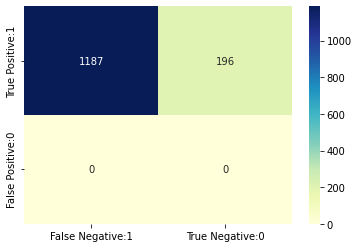

In [22]:
cm_matrix = pd.DataFrame(data=cm[:2, :2], columns=['True Positive:1', 'False Positive:0'], index=['False Negative:1', 'True Negative:0'])
cm = confusion_matrix(y_test, y_pred)
output = sns.heatmap(cm_matrix.T, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('output_svm.jpg', dpi=300, bbox_inches='tight')

In [23]:
print(classification_report(y_test, y_pred, zero_division=0))
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

with open("classification_report_SVM.json", "w") as file:
    json.dump(report, file)

              precision    recall  f1-score   support

           1       0.83      1.00      0.91      1187
           2       0.00      0.00      0.00       196
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.82      1453
   macro avg       0.08      0.10      0.09      1453
weighted avg       0.68      0.82      0.74      1453

